In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow import keras
from keras import layers
from tensorflow.keras.utils import image_dataset_from_directory
import numpy as np
import pandas as pd
import os

import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers



In [ ]:
train_dataset = image_dataset_from_directory(
   '/content/drive/MyDrive/Colab Notebooks/chest_xray/train',
    image_size=(224, 224),
    batch_size=32
)
validation_dataset = image_dataset_from_directory(
   '/content/drive/MyDrive/Colab Notebooks/chest_xray/val',
    image_size=(224, 224),
    batch_size=32
)
test_dataset = image_dataset_from_directory(
   '/content/drive/MyDrive/Colab Notebooks/chest_xray/test',
    image_size=(224, 224),
    batch_size=32
)

Found 5216 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, Add, GlobalAveragePooling2D, Dense

data_augmentation = keras.Sequential(
    [
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2)
    ]
)

def residual_block(x, filters, stride=1):
    residual = x

    if stride != 1 or x.shape[-1] != filters:
        residual = layers.Conv2D(filters, 1, strides=stride)(residual)
        residual = layers.BatchNormalization()(residual)

    x = layers.Conv2D(filters, 3, padding='same', strides=stride)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(filters, 3, padding='same')(x)
    x = layers.BatchNormalization()(x)

    x = layers.Add()([x, residual])
    x = layers.Activation('relu')(x)

    return x

def build_resnet(input_shape, num_classes=1):
    inputs = keras.Input(shape=input_shape)
    x = data_augmentation(inputs)
    x = layers.Conv2D(32, 7, strides=2, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D(pool_size=3, strides=2, padding='same')(x)

    x = residual_block(x, 32)
    x = residual_block(x, 64, stride=2)
    x = residual_block(x, 128, stride=2)

    x = layers.GlobalAveragePooling2D()(x)
    outputs = layers.Dense(num_classes, activation='sigmoid')(x)

    return keras.Model(inputs, outputs)

In [ ]:
model = build_resnet((224, 224, 3))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
import datetime

log_dir = "logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 sequential_1 (Sequential)      (None, 224, 224, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv2d_9 (Conv2D)              (None, 112, 112, 32  4736        ['sequential_1[0][0]']           
                                )                                                                 
                                                                                            

In [ ]:
model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=10,
    callbacks=[tensorboard_callback]
)

Epoch 1/10
163/163 [==============================] - 874s 5s/step - loss: 0.2640 - accuracy: 0.8861 - val_loss: 7.6572 - val_accuracy: 0.5000
Epoch 2/10
163/163 [==============================] - 40s 238ms/step - loss: 0.1951 - accuracy: 0.9241 - val_loss: 10.2439 - val_accuracy: 0.5000
Epoch 3/10
163/163 [==============================] - 39s 229ms/step - loss: 0.1722 - accuracy: 0.9304 - val_loss: 1.2005 - val_accuracy: 0.3750
Epoch 4/10
163/163 [==============================] - 41s 244ms/step - loss: 0.1594 - accuracy: 0.9400 - val_loss: 4.4308 - val_accuracy: 0.5000
Epoch 5/10
163/163 [==============================] - 39s 226ms/step - loss: 0.1458 - accuracy: 0.9473 - val_loss: 1.5065 - val_accuracy: 0.4375
Epoch 6/10
163/163 [==============================] - 40s 230ms/step - loss: 0.1432 - accuracy: 0.9448 - val_loss: 2.5963 - val_accuracy: 0.5625
Epoch 7/10
163/163 [==============================] - 40s 237ms/step - loss: 0.1274 - accuracy: 0.9551 - val_loss: 21.2882 - val_ac

In [ ]:
import datetime

log_dir = "logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [ ]:
%load_ext tensorboard

In [ ]:
%tensorboard --logdir=/content/logs

ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
2023-06-22 06:57:44.125589: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/local/lib/python3.10/dist-packages/tensorboard_data_server/bin/server: /lib/x86_64-linux-gnu/libc.so.6: version `GLIBC_2.33' not found (required by /usr/local/lib/python3.10/dist-packages/tensorboard_data_server/bin/server)
/usr/local/lib/python3.10/dist-packages/tensorboard_data_server/bin/server: /lib/x86_64-linux-gnu/libc.so.6: version `GLIBC_2.34' not found (required by /usr/local/lib/python3.10/dist-packages/tensorboard_data_server/bin/server)
/usr/local/lib/python3.10/dist-packages/tensorboard_data_server/bin/server: /lib/x86_64-linux-gnu/libc.so.6: version `GLIBC_2.32' not found (required by /usr/local/lib/python3.10/dist-packages/tensorboard_data_server/bin/server)
Address already in use
Port 6006 is in use by another program. Either identify and stop that program, or start the s

In [ ]:
!tensorboard dev upload --logdir /content/logs

2023-06-22 07:05:39.224527: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

/content/logs

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

To sign in with the TensorBoard uploader:

1. On your computer or phone, visit:

   https://www.google.com/device

2. Sign in with your Google account, then enter:

   QFT-TBQ-RZT

QFT-TBQ-RZT

Upload started and will continue reading any new data as it's added t

In [45]:
from keras import backend as K
image_path = '/content/drive/MyDrive/Colab Notebooks/chest_xray/test/PNEUMONIA/person109_bacteria_526.jpeg'
class_index = 0

In [47]:
def generate_cam(model, img_array, class_index):
    last_conv_layer = model.get_layer("conv2d_17")

    grad_model = tf.keras.models.Model(inputs=model.inputs, outputs=[last_conv_layer.output, model.output])

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, class_index]

    grads = tape.gradient(loss, conv_outputs)[0]
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    heatmap = tf.reduce_sum(tf.multiply(pooled_grads, conv_outputs[0]), axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)

    heatmap = cv2.resize(heatmap, (img_array.shape[2], img_array.shape[1]))

    return heatmap

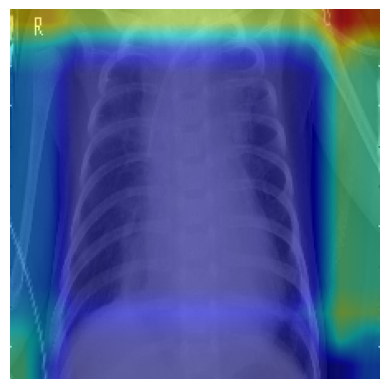

In [51]:
img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224), color_mode='grayscale')
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0
img_array_rgb = np.concatenate([img_array] * 3, axis=-1)


cam = generate_cam(model, img_array_rgb, class_index)

heatmap = cv2.applyColorMap(np.uint8(255 * cam), cv2.COLORMAP_JET)
heatmap = heatmap.astype(np.float32) / 255.0

cam_img = cv2.addWeighted(cv2.cvtColor(img_array[0], cv2.COLOR_GRAY2BGR), 0.5, heatmap, 0.5, 0)

plt.imshow(cam_img)
plt.axis('off')
plt.show()